<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S11_C4_CNN_CF10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Redes Neuronales Convulcionales](https://www.ibm.com/es-es/topics/convolutional-neural-networks)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10 as cf10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

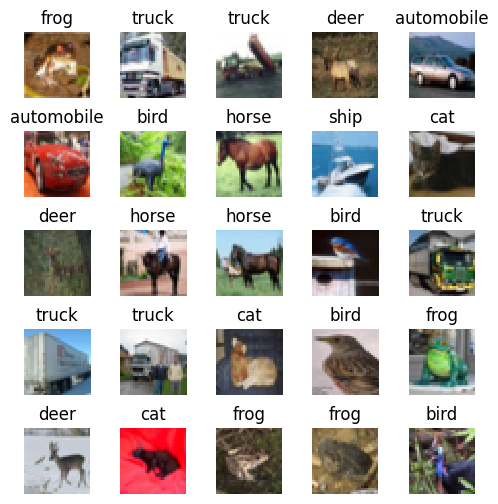

In [ ]:
# initialize the label names for the CIFAR-10 dataset
class_names = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]
num_classes = len(class_names)

n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[train_labels[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Configurar el entorno

In [ ]:
import keras
print(keras.__version__)

3.7.0


In [ ]:
!pip install --upgrade tensorflow keras # para aumentar la version de keras

In [ ]:
import tensorflow as tf
import keras
print(keras.__version__)


3.7.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# modelos de prueba
from tensorflow.keras.datasets import cifar10 as cf10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Experimento 1.
VGG1.

32 filtros de 3x3

input_shape=(32, 32, 3) **RGB**:
* dimension de color **R** rojo
* dimension de color **G** verde
* dimendion de color **B** azul

In [ ]:
model_vgg1 = Sequential()
# Numero de filtros y su dimension(kernel), Activacion:, padding
model_vgg1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  # se usan 32 filtros de 3x3 acomodando las imagenes con padding
  # salen 32 imagenes filtradas de 11x11 de la primera covolucional
model_vgg1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  # se usan 32 filtros de 3x3 acomodando las imagenes con padding
  # salen 1024 imagenes filtradas de 4x4 de la segunda covolucional
model_vgg1.add(MaxPooling2D(pool_size=(2, 2)))
  # se usa un filtro de 2x2
  # salen 1024 imagenes filtradas de 2x2

# en adelante montamos la NN
model_vgg1.add(Flatten())
model_vgg1.add(Dense(128, activation='relu'))
model_vgg1.add(Dense(10, activation='softmax'))

In [ ]:
model_vgg1.summary()

In [ ]:
model_vgg1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32

Train_images = 50000
Validate = 50000

validation_split=0.1
train_imagen = 45000
45000/32 = 1407

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = cf10.load_data()
model_history = model_vgg1.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 101ms/step - accuracy: 0.3876 - loss: 1.7266 - val_accuracy: 0.4862 - val_loss: 1.4411
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 140s 100ms/step - accuracy: 0.5569 - loss: 1.2626 - val_accuracy: 0.5622 - val_loss: 1.2476
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 144s 102ms/step - accuracy: 0.6574 - loss: 0.9769 - val_accuracy: 0.5902 - val_loss: 1.2036
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 200s 101ms/step - accuracy: 0.7319 - loss: 0.7647 - val_accuracy: 0.5892 - val_loss: 1.3442
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 149s 106ms/step - accuracy: 0.7979 - loss: 0.5795 - val_accuracy: 0.6074 - val_loss: 1.3476
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 194s 100ms/step - accuracy: 0.8499 - loss: 0.4335 - val_accuracy: 0.5842 - val_loss: 1.6682
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 100ms/step - accuracy: 0.8821 - loss: 0.3435 - val_accuracy: 0.5878 - val_loss: 1.9966
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 144s 102ms/step - ac

#Datos de prueba

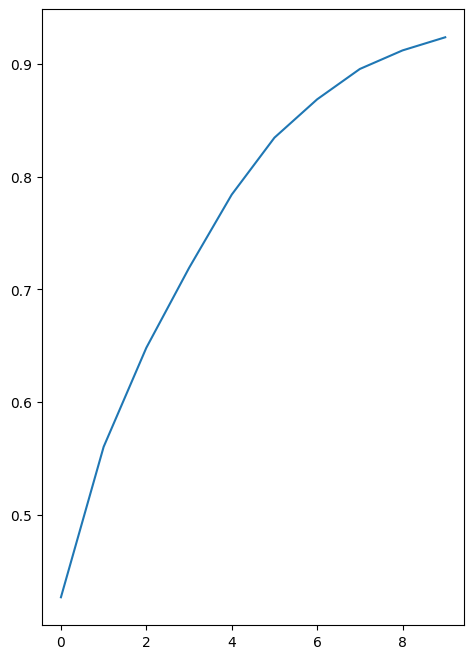

In [ ]:
plt.plot(model_history.history['accuracy'])

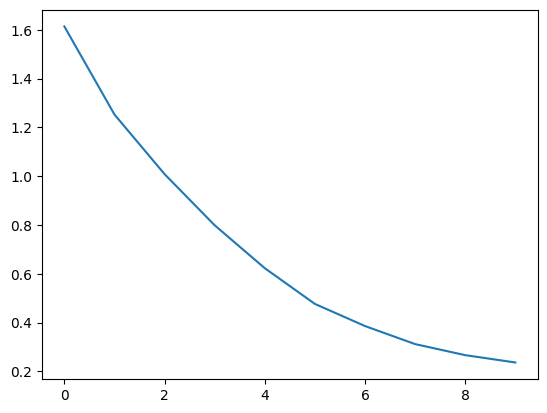

In [ ]:
plt.plot(model_history.history['loss'])

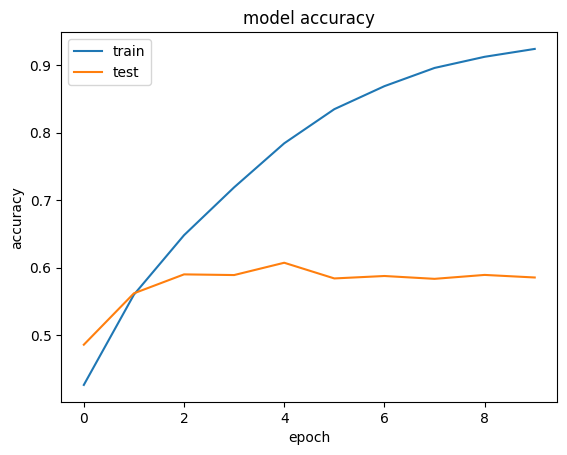

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
scores = model_vgg1.evaluate(test_images, test_labels)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5822 - loss: 2.4823
Test loss: 2.5236172676086426
Test accuracy: 0.578499972820282


# Experimento 2
otras convolucionales

In [ ]:
model_vgg2 = Sequential()
# Numero de filtros y su dimension(kernel), Activacion:, padding
model_vgg2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_vgg2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2, 2)))
  # se usa un filtro de 2x2
  # salen 1024 imagenes filtradas de 2x2

model_vgg2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2, 2)))

# en adelante montamos la NN
model_vgg2.add(Flatten())
model_vgg2.add(Dense(128, activation='relu'))
model_vgg2.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_vgg1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,180,416 (12.13 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,120,278 (8.09 MB)

In [ ]:
model_vgg2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_vgg2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32

In [ ]:
len(train_images)

50000

In [ ]:
model_history2 = model_vgg2.fit(train_images,
                                train_labels,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 274s 174ms/step - accuracy: 0.3911 - loss: 2.5733
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 328s 178ms/step - accuracy: 0.6202 - loss: 1.0851
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 271s 173ms/step - accuracy: 0.6850 - loss: 0.9042
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 326s 176ms/step - accuracy: 0.7337 - loss: 0.7695
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 282s 181ms/step - accuracy: 0.7660 - loss: 0.6697
Epoch 6/10


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model_history2.history['accuracy'])
plt.subplot(1, 2, 2)
plt.plot(model_history2.history['loss'])

In [ ]:
scores = model_vgg2.evaluate(test_images, test_labels)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
# Nos ayuda a seleccionar la clase con el valos mas alto de la salida de Softmax
pred_images = np.argmax(model_vgg2.predict(test_images), axis=1)

In [ ]:
from sklearn import confusion_matrix, classification_report
import seaborn as sns

cf_model2 = confusion_matrix(y_true = test_labels, y_pred = pred_images)

sns.heatmap(cf_model2, annot=True, cmap='Blues', fmt='g')

# Guardar el modelo

In [ ]:
import os
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'vgg2.h5')